In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL HOMEWORK 1

Mounted at /gdrive
/gdrive/My Drive/[2024-2025] AN2DL HOMEWORK 1


In [2]:
# Fix randomness and hide warnings
seed = 42

# Filter warnings from keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(seed)
print(f"TensorFlow version {tf.__version__}")

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=14)
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

TensorFlow version 2.17.0


In [54]:
data = np.load('training_set.npz')
X = data['images']
y = data['labels']

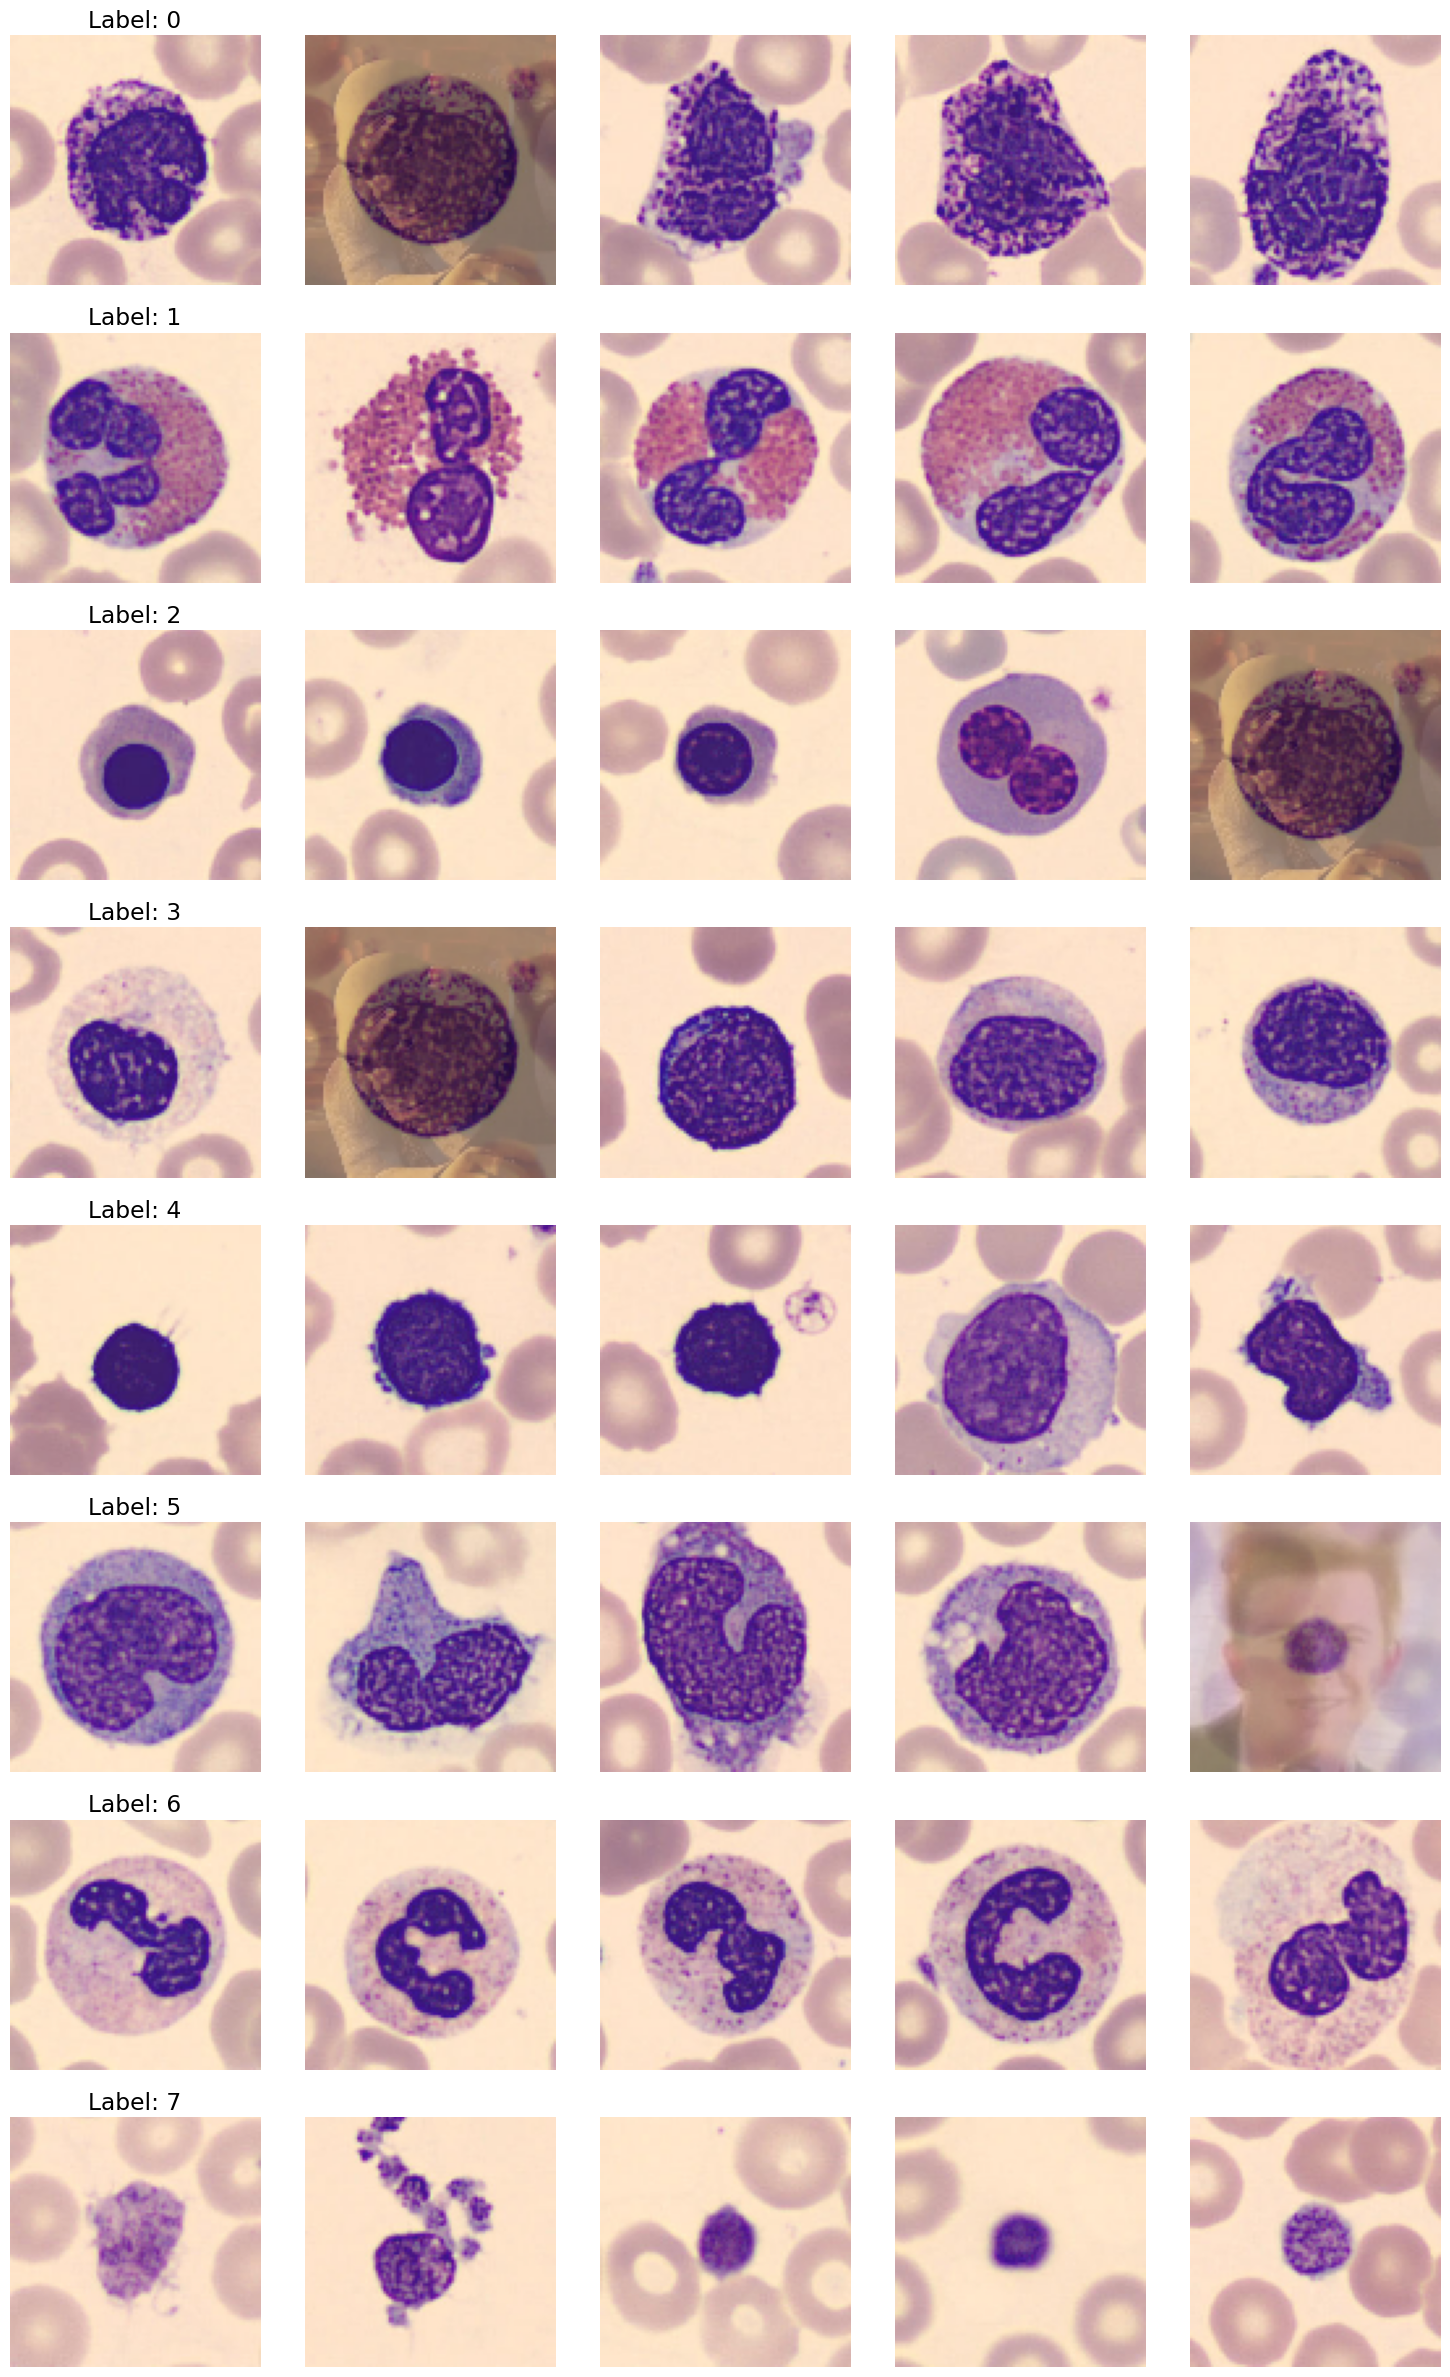

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Assuming X is your image array and y is your label array
# X shape: (n_samples, height, width, channels)
# y shape: (n_samples,)

# Number of samples to show per label
samples_per_label = 5

# Shuffle the data to ensure random sampling
X_sh, y_sh = shuffle(X, y, random_state=42)

# Get unique labels
unique_labels = np.unique(y)

# Set up the plot
n_labels = len(unique_labels)
fig, axes = plt.subplots(n_labels, samples_per_label, figsize=(3*samples_per_label, 3*n_labels))

# Plot sample images for each label
for i, label in enumerate(unique_labels):
    # Find all occurrences of this label
    indices = np.where(y_sh == label)[0]

    # Select a subset of these indices
    selected_indices = indices[:samples_per_label]

    for j, idx in enumerate(selected_indices):
        # Get the corresponding image
        img = X_sh[idx]

        # Plot the image
        axes[i, j].imshow(img)
        axes[i, j].axis('off')

        # Add label to the first image in the row
        if j == 0:
            axes[i, j].set_title(f'Label: {label}')

plt.tight_layout()
plt.show()

Rick roll!!! Outliers. Gotta find a way to remove them. It seems like it's only label 5 images to be affected.

In [55]:
# Get unique labels and print statistics
unique_labels = np.unique(y)
print(f"Number of unique labels: {len(unique_labels)}")
for label in unique_labels:
    print(f"Number of images with label {label}: {len(np.where(y == label)[0])}")

Number of unique labels: 8
Number of images with label 0: 1052
Number of images with label 1: 2381
Number of images with label 2: 1285
Number of images with label 3: 2226
Number of images with label 4: 1049
Number of images with label 5: 1393
Number of images with label 6: 2530
Number of images with label 7: 1843


Pretty unbalanced dataset as well.

# Outlier Detection Techniques

## Latent Representation Projection

Using the latend representation from a pretrained model and projecting it in lower dimensionality to see whether visible differences between rick and cells.

In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import numpy as np

# Load pre-trained model without the top layers
model = VGG16(weights="imagenet", include_top=False)

def extract_features_from_array(img_array):
    # Resize image to (224, 224) and preprocess
    img_resized = array_to_img(img_array).resize((32, 32))
    img_array = img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return model.predict(img_array).flatten()

sample_size = 100
X_sample = X[:sample_size]

# Extract features for each image in X
features = [extract_features_from_array(img) for img in X_sample]

# Reduce dimensions for easier outlier detection
pca = PCA(n_components=50)
features_reduced = pca.fit_transform(features)

# Use Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination level as needed
outliers = iso_forest.fit_predict(features_reduced)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━

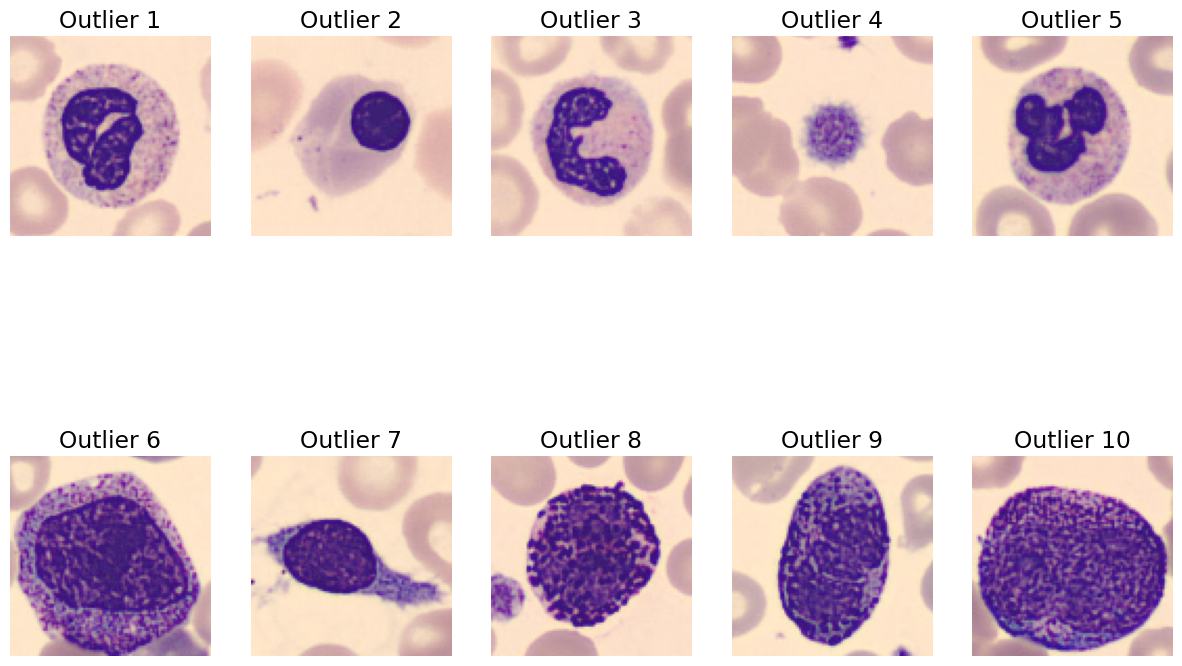

In [17]:
import matplotlib.pyplot as plt

# Find indices of outliers in the sample
outlier_indices = [i for i, label in enumerate(outliers) if label == -1]

# Display the outlier images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(outlier_indices):
    plt.subplot(2, 5, i + 1)  # Adjust the grid size as needed
    plt.imshow(X_sample[idx].astype("uint8"))  # Convert to uint8 if needed for display
    plt.axis('off')
    plt.title(f'Outlier {i+1}')
plt.show()


This shit ain't working :(

## Visual Inspection

After trying working in latent space, realized it would have required time. We tried visually inspecting them, noticed at the end, therefore just sliced.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Filter images with label 5
label_5_indices = np.where(y == 7)[0]
X_label_5 = X[label_5_indices]

print(f"Number of images with label 5: {len(X_label_5)}")

# Function to display multiple images
def show_images(start_index, num_cols=6, num_rows=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
    fig.suptitle("Candidate Template Images (Label 5)", fontsize=12)

    for i, ax in enumerate(axes.flat):
        if i < len(X_label_5) - start_index:
            img_index = start_index + i
            ax.imshow(X_label_5[img_index])
            ax.set_title(f"Idx: {label_5_indices[img_index]}", fontsize=6)
        ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust to prevent title overlap
    plt.show()

# Create an interactive widget to browse through images with label 5
max_start = max(0, len(X_label_5) - 30)  # Ensure we don't go out of bounds
interact(show_images, start_index=IntSlider(min=0, max=max_start, step=30, value=0))

# Function to extract and save the template
def extract_template(index):
    template = X_label_5[index]
    np.save('template.npy', template)
    # print(f"Template image (original index {label_5_indices[index]}) saved as 'template.npy'")
    return template

# After browsing, when you've found the image you want to use as a template,
# run this cell with the appropriate index
template_index = 0  # Replace with the index of your chosen template image from the label 5 subset
template = extract_template(template_index)

# # Display the extracted template
# plt.figure(figsize=(5, 5))
# plt.imshow(template)
# plt.title("Extracted Template")
# plt.axis('off')
# plt.show()

Number of images with label 5: 13759


interactive(children=(IntSlider(value=0, description='start_index', max=13729, step=30), IntSlider(value=6, de…

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Function to display multiple images
def show_images(start_index, num_cols=6, num_rows=5, save_plot=False):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))
    fig.suptitle("Dataset Images", fontsize=12)

    for i, ax in enumerate(axes.flat):
        if i < len(X) - start_index:
            img_index = start_index + i
            ax.imshow(X[img_index])
            ax.set_title(f"Label: {y[img_index]}, Idx: {img_index}", fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust to prevent title overlap

    if save_plot:
        plot_filename = f"plot_start_index_{start_index}.png"
        plt.savefig(plot_filename, bbox_inches='tight')
        print(f"Plot saved as '{plot_filename}'")

    plt.show()

# Create an interactive widget to browse through all images
max_start = max(0, len(X) - 30)  # Ensure we don't go out of bounds
interact(show_images, start_index=IntSlider(min=0, max=max_start, step=30, value=0))

# Function to extract and save the template
def extract_template(index):
    template = X[index]
    np.save('template.npy', template)
    print(f"Template image (index {index}, label {y[index]}) saved as 'template.npy'")
    return template

# After browsing, when you've found the image you want to use as a template,
# run this cell with the appropriate index
template_index = 0  # Replace with the index of your chosen template image
template = extract_template(template_index)

# # Display the extracted template
# plt.figure(figsize=(5, 5))
# plt.imshow(template)
# plt.title(f"Extracted Template (Label: {y[template_index]})")
# plt.axis('off')
# plt.show()

interactive(children=(IntSlider(value=0, description='start_index', max=13729, step=30), IntSlider(value=6, de…

Template image (index 0, label [7]) saved as 'template.npy'


The duplicates and rick rolls are all at the end. Extracting the two images from which we visually determined the indexes. Images with label 5 were the only affected ones.

In [50]:
# Removing outliers
X_out = X[:13559]
y_out = y[:13559]

# Removing duplicates
X_dup = X_out[:11960]
y_dup = y_out[:11960]

# Dataset Balancing

Number of unique labels: 8
Number of images with label 0: 853
Number of images with label 1: 2181
Number of images with label 2: 1085
Number of images with label 3: 2026
Number of images with label 4: 849
Number of images with label 5: 993
Number of images with label 6: 2330
Number of images with label 7: 1643


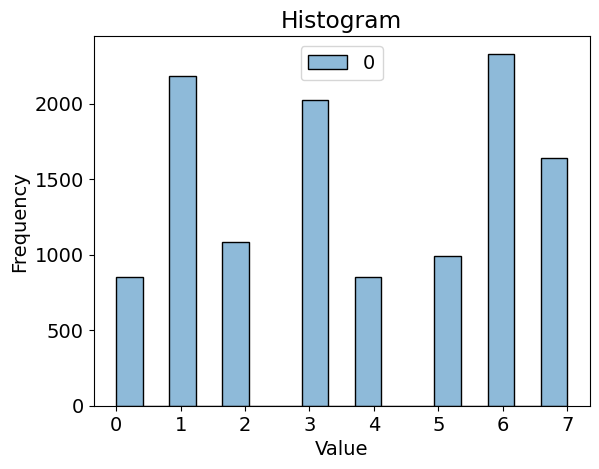

In [63]:
X = X_dup
y = y_dup

# Get unique labels and print statistics
unique_labels = np.unique(y)
print(f"Number of unique labels: {len(unique_labels)}")
for label in unique_labels:
    print(f"Number of images with label {label}: {len(np.where(y == label)[0])}")

import seaborn as sns
import numpy as np

# Create histogram
sns.histplot(data=y)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Justifying the valdity of the transformans used i.e. Boracchi facotry chip slide.